## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from tqdm import tqdm

from main import Choleski_sla, Choleski_numpy


## Matrice

A: [[ 3. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  3. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  3. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  3. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  3. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  3. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  3. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  3. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  3. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  3.]] 

b: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



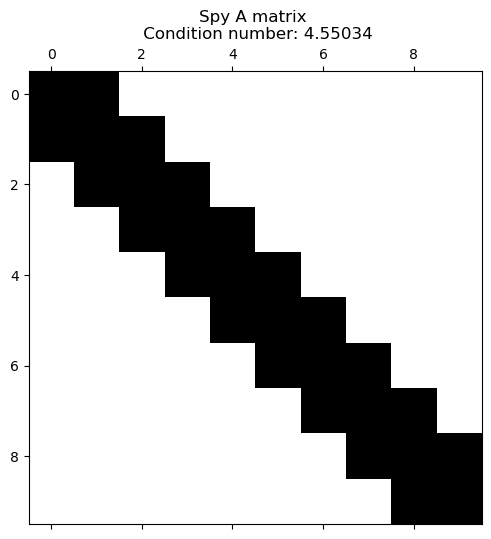

In [35]:
def create_test_matrix(dim = 10):

    A = np.diag(np.array([3.] * dim))
    for i, j in zip(range(1, dim), range(0, dim-1)):
        A[i, j] = -1
        A[j, i] = -1

    b = np.array([1.] * dim)

    return A, b

##########
#####
##########

A, b = create_test_matrix(dim = 10)
print(f'A: {A} \n')
print(f'b: {b}')

print()

plt.figure(figsize = (6, 6), dpi = 100)
plt.spy(
    A, 
    precision = 0, 
    marker = None, 
    markersize = None
)
plt.title(f'Spy A matrix \n Condition number: {round(np.linalg.cond(A), 5)}')
plt.show()

## Benchmarks

In [30]:
# getting matrix
A, b = create_test_matrix(dim = 100)

# sla_sol = Choleski_sla(A, b)
sla_res = []
np_res = []

runs = 50

for i in tqdm(range(runs)):
    sla_res.append(Choleski_sla(A, b))
    np_res.append(Choleski_numpy(A, b))


100%|██████████| 50/50 [00:00<00:00, 543.95it/s]


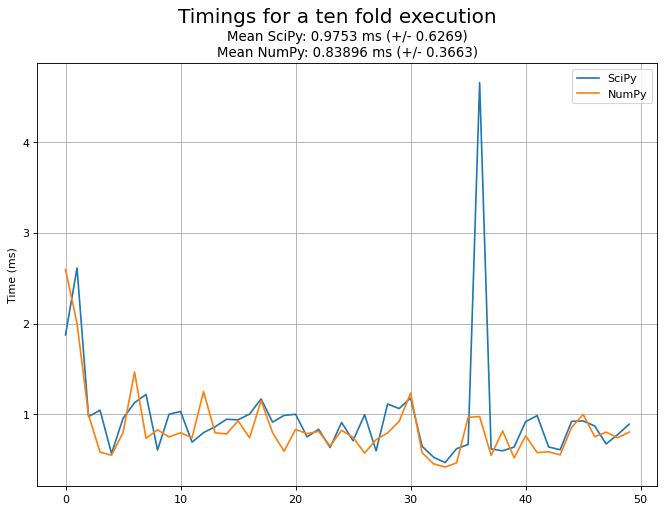

In [68]:
timings_sla = [ele['time']*1000 for ele in sla_res]
timings_np = [ele['time']*1000 for ele in np_res]

plt.figure(figsize = (10, 7), dpi = 80)
plt.plot(timings_sla, label = 'SciPy')
plt.plot(timings_np, label = 'NumPy')
plt.grid()
plt.legend()
plt.ylabel('Time (ms)')
plt.suptitle('Timings for a ten fold execution', fontsize = 18)
plt.title(f'Mean SciPy: {round(np.mean(timings_sla), 5)} ms (+/- {round(np.std(timings_sla), 4)})\nMean NumPy: {round(np.mean(timings_np), 5)} ms (+/- {round(np.std(timings_np), 4)})')
plt.show()


## Test vari

In [71]:
# provare a fare grafico andamento del tempo di calcolo aumentando la grandezza della matrice
# in pratica: asse x = dimensione matrice, asse y = tempo impiegato
# ogni test per ogni dimensione deve effettuare una prova di 10 volte prendendo quindi la media e la sua std

sla_res_dim = {}
sla_res_np = {}

dim_max = 10000
step = 100

for dim in tqdm(range(0, dim_max + 1, step)):
    A, b = create_test_matrix(dim = dim)
    sla_res_dim[dim] = []
    sla_res_np[dim] = []
    for t in range(10):
        sla_res_dim[dim].append(Choleski_sla(A, b))
        sla_res_np[dim].append(Choleski_numpy(A, b))


100%|██████████| 101/101 [34:30<00:00, 20.50s/it]


In [72]:
avgs_sla = []
stds_sla = []
avgs_np = []
stds_np = []


for dim in range(0, dim_max + 1, step):
    avgs_sla.append(np.mean([ele['time'] for ele in sla_res_dim[dim]]))
    avgs_np.append(np.mean([ele['time'] for ele in sla_res_np[dim]]))
    stds_sla.append(np.std([ele['time'] for ele in sla_res_dim[dim]]))
    stds_np.append(np.std([ele['time'] for ele in sla_res_np[dim]]))


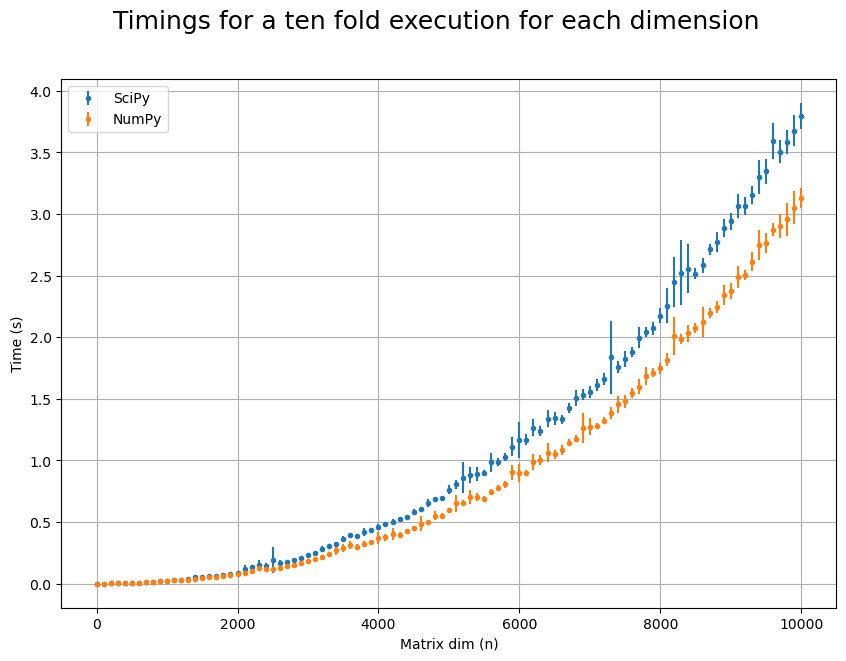

In [76]:

plt.figure(figsize = (10, 7), dpi = 100)
# plt.plot(avgs_sla, label = 'SciPy')
# plt.plot(avgs_np, label = 'numPy')
plt.errorbar(range(0, dim_max + 1, step), avgs_sla, stds_sla, linestyle='None', marker='.', label = 'SciPy')
plt.errorbar(range(0, dim_max + 1, step), avgs_np, stds_np, linestyle='None', marker='.', label = 'NumPy')
plt.ylabel('Time (s)')
plt.xlabel('Matrix dim (n)')
plt.suptitle('Timings for a ten fold execution for each dimension', fontsize = 18)
# plt.title(f'Mean SciPy: {round(np.mean(timings_sla), 5)} ms (+/- {round(np.std(timings_sla), 4)})\nMean NumPy: {round(np.mean(timings_np), 5)} ms (+/- {round(np.std(timings_np), 4)})')
plt.legend()
plt.grid()
plt.show()


In [85]:
import pandas as pd

tmp_df = {}
tmp_df['dimension'] = [ele for ele in range(0, dim_max + 1, step)]
tmp_df['avgs_sla'] = avgs_sla
tmp_df['stds_sla'] = stds_sla
tmp_df['avgs_np'] = avgs_np
tmp_df['stds_np'] = stds_np

df = pd.DataFrame.from_dict(tmp_df)
df.to_csv('./Ten_fold_execution_for_each_dimension.csv')


In [83]:
sla_res_dim[10000]

[{'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.9534788131713867},
 {'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.970659017562866},
 {'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.737226963043213},
 {'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.6935343742370605},
 {'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.665699005126953},
 {'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.8905768394470215},
 {'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.823982000350952},
 {'result': array([0.61803399, 0.85410

Suggerimenti random: unica cosa da controllare per la 'qualità' della matrice è il numero di condizionamento (calcolato preferibilmente su matlab che è sicuramente più preciso). Per le misure di performance è consigliabile usare la norma a 2 (che è calcolata come il massimo dell'autovalore a differenza di quella infinito dove la matrice deve essere invertita e potrbbe essere quindi introdotto un errore)